<a href="https://colab.research.google.com/github/dkaratzas/DL2022-23/blob/main/Problems%202%20-%20Using%20Autograd%20and%20PyTorch/P2_2_Intro_Tensors_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/DL2022-23/blob/main/Problems%202%20-%20Using%20Autograd%20and%20PyTorch/P2_2_Intro_Tensors_Solutions.ipynb)

# What is PyTorch?

<a href="https://pytorch.org/">Pytorch</a> is a Python based scientific computing package targeted at two types of audience:

-  At the low level, it is a tensor library capable to exploit the computational power of GPUs
-  At the high level, it is a deep learning research platform that provides maximum flexibility and speed

## Import the library

In [9]:
import torch

## Getting help in Jupyter

The fastest way to get some quick help on something using Jupyter is to just ask! Type any Python object name you want followed by a question mark `?` and the code documentation will be loaded in your notebook. Try it with `torch`

In [10]:
torch?

Type:        module
String form: <module 'torch' from 'C:\\ProgramData\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\torch\\__init__.py'>
File:        c:\programdata\anaconda3\envs\pytorch\lib\site-packages\torch\__init__.py
Docstring:  
The torch package contains data structures for multi-dimensional
tensors and defines mathematical operations over these tensors.
Additionally, it provides many utilities for efficient serializing of
Tensors and arbitrary types, and other useful utilities.

It has a CUDA counterpart, that enables you to run your tensor computations
on an NVIDIA GPU with compute capability >= 3.0.


The following command will list all objects of torch that with a name that finishes with "Tensor"

In [11]:
# In Colab, you can press <esc> to get out of help
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

If you use Colab, you also have a handy autocomplete feature at hand. For example, start writing a function name, like `torch.sqrt` if you pause after the first few characters a context menu with possible options will appear. Select the term you meant and press Tab or Enter to autocomplete. Note, this will not work in Jupyter Lab / Notebook out of the box, you would need to install an extension to enable this functionality.

In [12]:
# complete by typing a little bit more (e.g. torch.sqr), wait and then use <Tab> or <Enter> to autocomplete to torch.sqrt()

torch.sqrt(torch.tensor(4.0))

tensor(2.)

In Jupyter Lab (but not in CoLab) you can access the documentation by clicking on the Python object and pressing `<Shift>` + `<Tab>`. Try it in the line below (if you are using Jupyter Lab)

In [13]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

You should see the same result as with the line below

In [14]:
# Annotate your functions / classes!
torch.nn.Module?

Init signature: torch.nn.Module() -> None
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule

Where does this documentation come from? Part of it comes from the code itself, and part of it from the annotations (special comments) that are introduced in the function / class definitions. To have a look at the actual code of a function, just use a double `??`. See for example below, and get used to annotating your functions / classes as well!

In [ ]:
torch.nn.Module??

## Torch!

At the core of PyTorch there is the `Tensor` class. It is very much like numpy's arrays, but supports autograd.

In [16]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [17]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [18]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [19]:
t

tensor([[[1.0194e-38, 1.0469e-38, 1.0010e-38, 8.9081e-39],
         [8.9082e-39, 5.9694e-39, 8.9082e-39, 1.0194e-38],
         [9.1837e-39, 4.6837e-39, 9.2755e-39, 1.0837e-38]],

        [[8.4490e-39, 1.1112e-38, 1.0194e-38, 9.0919e-39],
         [8.4490e-39, 9.6429e-39, 8.4490e-39, 9.6429e-39],
         [9.2755e-39, 1.0286e-38, 9.0919e-39, 8.9082e-39]]])

In [20]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[2., 9., 6., 3.],
         [7., 0., 5., 9.],
         [2., 5., 3., 4.]],

        [[1., 7., 4., 5.],
         [2., 3., 2., 3.],
         [3., 0., 2., 5.]]])

In [21]:
r = t.view(3, 8)
r

tensor([[2., 9., 6., 3., 7., 0., 5., 9.],
        [2., 5., 3., 4., 1., 7., 4., 5.],
        [2., 3., 2., 3., 3., 0., 2., 5.]])

In [22]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [24]:
# What are strides. And how are they related to shapes?
print(t.stride(), r.stride())
print(t.shape, r.shape)

(12, 4, 1) (8, 1)
torch.Size([2, 3, 4]) torch.Size([3, 8])


In [25]:
# Let's try that again without doing the operations in place
t.random_(10)

tensor([[[2., 8., 1., 4.],
         [7., 0., 8., 2.],
         [7., 8., 1., 7.]],

        [[9., 4., 4., 1.],
         [4., 0., 3., 0.],
         [7., 3., 6., 1.]]])

In [26]:
# Not in place
r = t.view(3, 8)
r = torch.zeros_like(r)
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
t

tensor([[[2., 8., 1., 4.],
         [7., 0., 8., 2.],
         [7., 8., 1., 7.]],

        [[9., 4., 4., 1.],
         [4., 0., 3., 0.],
         [7., 3., 6., 1.]]])

In [28]:
# What are strides?
print(t.stride(), r.stride())

(12, 4, 1) (8, 1)


In [29]:
# This *is* important
s = r.clone()

In [30]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [31]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

## Vectors (1D Tensors)

In [32]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [33]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [34]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [35]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [36]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [37]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([1., 2., 6., 0., 1.])

In [38]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 1.0, last: 1.0


In [39]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([2., 6.])

In [40]:
# Create a tensor with integers ranging from 1 to 4 (both included)
v = torch.arange(1, 5)
v

tensor([1, 2, 3, 4])

In [41]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


## Matrices (2D Tensors)

In [42]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [43]:
m.dim()

2

In [44]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [45]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [46]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [47]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [48]:
# Indexing column 1, all rows (returns size 2x1)
m[:, [1]]

tensor([[5.],
        [2.]])

In [49]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [50]:
# Create tensor of numbers from 1 to 5)
v = torch.arange(1., 5)
v

tensor([1., 2., 3., 4.])

In [51]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [52]:
# Scalar product
m @ v

tensor([49., 47.])

In [53]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[0, :] @ v

tensor(49.)

In [54]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [55]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.1939, 5.3053, 3.7638, 7.3557],
        [4.5513, 2.7232, 1.1609, 9.6928]])

In [56]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.7674, 4.4290, 2.8484, 6.1408],
        [3.3109, 1.7481, 0.2814, 8.4459]])

In [57]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[0.3454, 1.2105, 2.3611, 5.3299],
        [1.9466, 0.2669, 0.4961, 1.3498]])

In [58]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 2.3215,  7.5506, 12.6340, 10.6616],
        [ 8.4657, 18.9975,  1.1060, 10.2592]])

In [59]:
m.size()

torch.Size([2, 4])

In [60]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [61]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Broadcasting

Two tensors are “broadcastable” if the following rules hold:

*   Each tensor has at least one dimension.
*   When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.


In [62]:
x=torch.empty(5,7,3)
y=torch.empty(5,7,3)
# x and y are broadcastable since all dimensions are equal

x=torch.empty((0,))
y=torch.empty(2,2)
# x and y are not broadcastable, because x does not have at least 1 dimension

x=torch.empty(5,3,4,1)
y=torch.empty(  3,1,1)
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

# but:
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

In [63]:
# How is the output dimension calculated?
x=torch.empty(5,1,4,1)
y=torch.empty(3,1,1)
print((x+y).size())

x=torch.empty(1)
y=torch.empty(3,1,7)
print((x+y).size())

torch.Size([5, 3, 4, 1])
torch.Size([3, 1, 7])


## Constructors

In [64]:
# Create tensor from 3 to 8
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [65]:
# Create tensor from 5.7 to -2.1 with step -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [66]:
# returns a 1D tensor of equally spaced elements between start=3, end=8 and number of elements=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [67]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [68]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [69]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [70]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

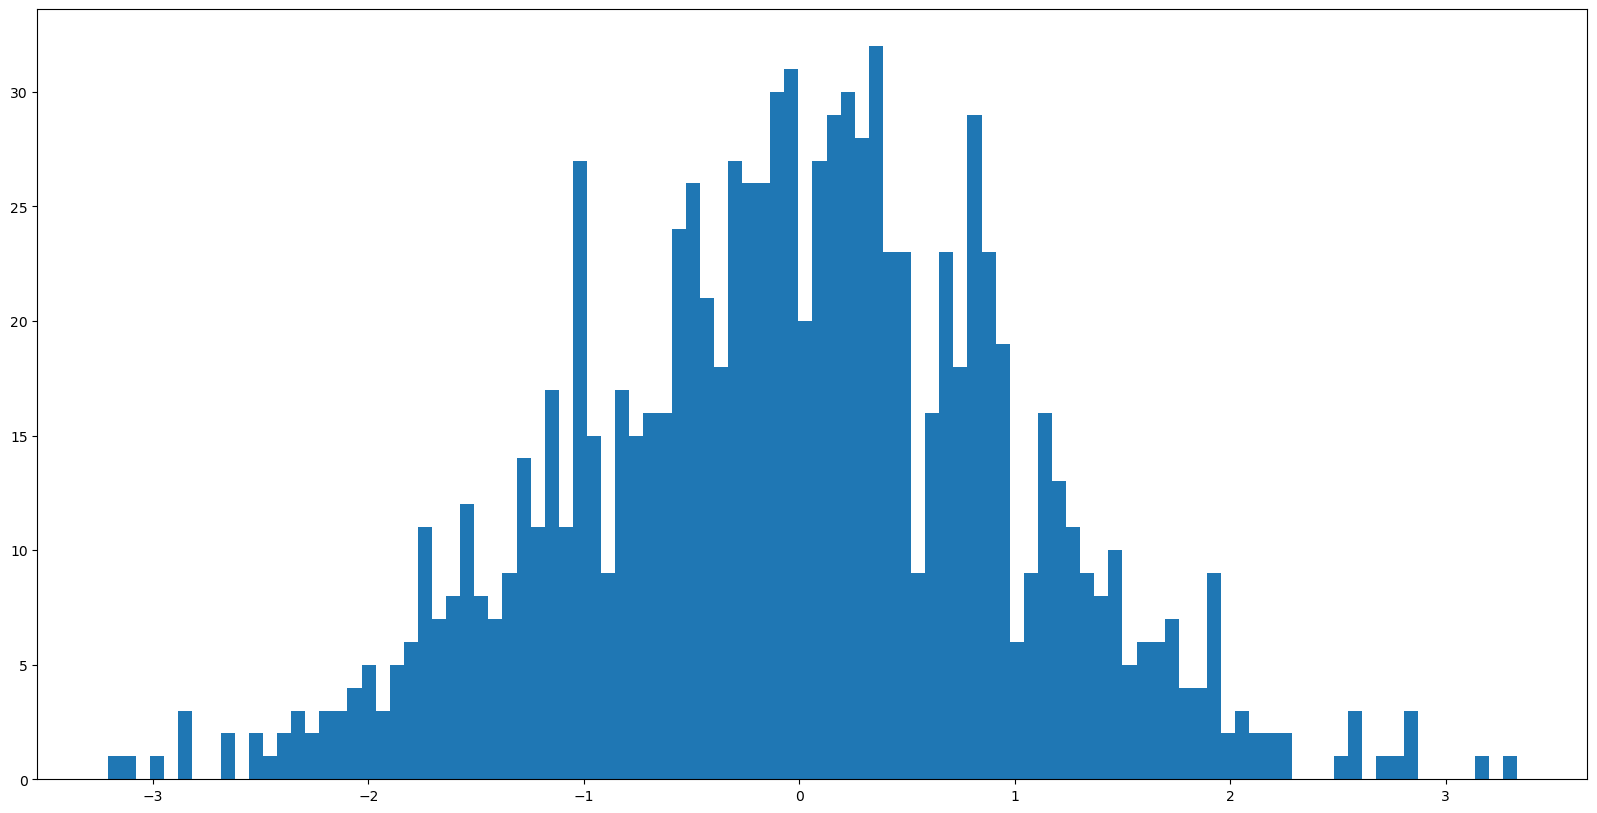

In [71]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

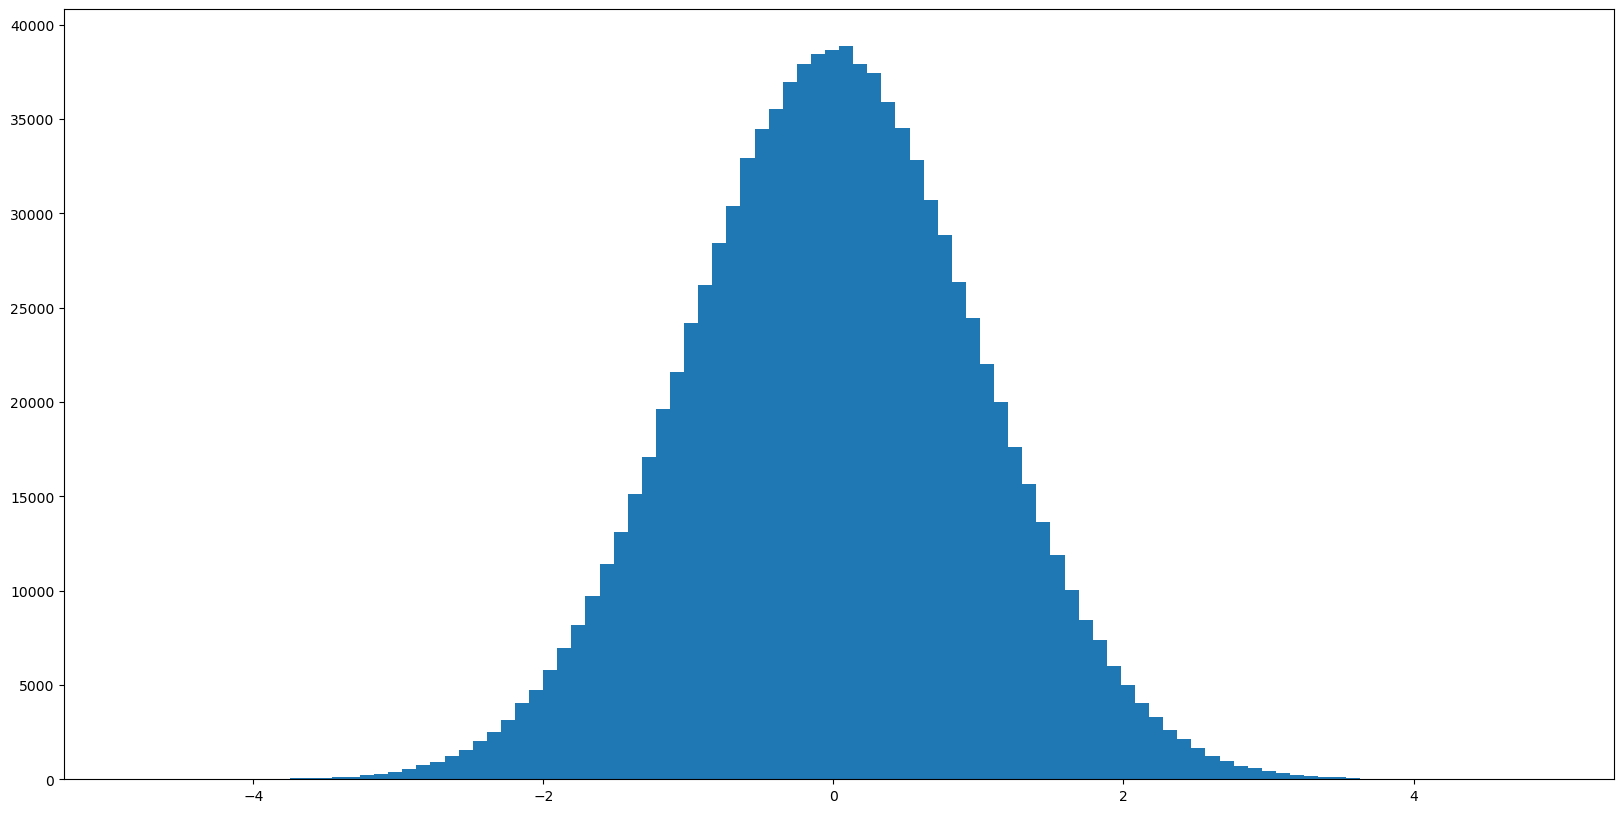

In [72]:
plt.hist(torch.randn(10**6).numpy(), 100);

## Casting

In [73]:
# Helper to get what kind of tensor types
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

In [74]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [75]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [76]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [77]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [78]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [79]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [80]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4], dtype=torch.int32)


In [81]:
# In-place multiplication of all elements by 2 for tensor n
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## Using the GPU

In [82]:
# If this cell fails you need to change the runtime of your colab notebook to GPU
# Go to Runtime -> Change Runtime Type and select GPU
assert torch.cuda.is_available(), "GPU is not enabled"

# use the first gpu available if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [83]:
# Tensors can be moved between gpu and cpu memory

tensor = torch.randn(5, 5) # create a 5x5 matrix filled with random numbers
print(f"tensor's device: {tensor.device}") # by default tensors are stored in cpu memory (RAM)

# Move your tensor to GPU device 0 if there is one (first GPU in the system)
if torch.cuda.is_available():
    tensor = tensor.to(device) # tensor.cuda() is an alternative although not recommended
print(f"tensor's device: {tensor.device}")

tensor's device: cpu
tensor's device: cuda:0


C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\torch\cuda\__init__.py:120: UserWarning: 
    Found GPU%d %s which is of cuda capability %d.%d.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is %d.%d.
    
  warnings.warn(old_gpu_warn.format(d, name, major, minor, min_arch // 10, min_arch % 10))


In [84]:
# A common mistake 
a = torch.randn(5, 2, device=device)
b = torch.randn(1, 2)

# This throws an exception, since you can't operate on tensors stored in
# different devices, and the error message is pretty clear about that
c = a * b

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

# Gradient Computation



In [85]:
# Tensors also track the operations applied on them in order to differentiate them

# setting requires_grad to true tells the autograd engine that we want to compute
# gradients for this tensor
a = torch.tensor([2., 3.], requires_grad=True)

L = 3*a**3
L.sum().backward()
print(f"Gradient of a with respecto to L: {a.grad}")

Gradient of a with respecto to L: tensor([36., 81.])


Lets check if the computed gradients are correct:

$\frac{\partial{L}}{\partial{a}} = [9 * a_1^2, 9 * a_2^2]$

$\frac{\partial{L}}{\partial{a}} = [9 * 2^2, 9 * 3^2]$

$\frac{\partial{L}}{\partial{a}} = [36, 81]$

As we can see the gradient vector matches the one computed by the autograd engine (no surprise there)

In [86]:
# Notice that the output tensor of an operation will require gradients even 
# if only a single input tensor has requires_grad=True.

x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does a require gradients? : {a.requires_grad}")
b = x + z
print(f"Does b require gradients?: {b.requires_grad}")

Does a require gradients? : False
Does b require gradients?: True


Let's repeat with PyTorch one of the gradient calculations what we already did before outselves (with our own auto-differentiation engine):

In [87]:
a = torch.tensor(4.0, requires_grad = True)  # a = 4
b = torch.tensor(3.0, requires_grad = True)  # b = 3
c = a + b        # c = 4 + 3
c.retain_grad()

res = a * c      # res = a * c = 28

print("Result =", res)

# Call backprop on the result
res.backward()

# Now all variables should contain in their "grad" the derivative d(res) / d(variable)
print("The derivative of the result with respect to a is:", a.grad)
print("The derivative of the result with respect to b is:", b.grad)
# Also for intermediate results
print("The derivative of the result with respect to c is:", c.grad)

Result = tensor(28., grad_fn=<MulBackward0>)
The derivative of the result with respect to a is: tensor(11.)
The derivative of the result with respect to b is: tensor(4.)
The derivative of the result with respect to c is: tensor(4.)


## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API can be found [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.

# Homework

<font color="blue">**Exercise 1:** The code below simulates a tiny neural network, however it throws an exception. As you build neural networks in PyTorch you will see this exception often. Look at the error message, explain whats happening and make the necessary changes to the code to get an output from this tiny network</font>

In [88]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# We are given 3 samples of dimensionality 5 (here we generate random samples)
features = torch.randn((3, 5))
# Random weights for our data
weights = torch.randn(1,5)
# and a true bias term
bias = torch.randn((1, 1))
fts = torch.mm(features, weights)
print(fts + bias)
print(fts.shape, bias.shape)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x5 and 1x5)

**Response:**

In [89]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# We are given 3 samples of dimensionality 5 (here we generate random samples)
features = torch.randn((3, 5))
# Random weights for our data
weights = torch.randn(1,5)
# and a true bias term
bias = torch.randn((1, 1))
fts = torch.mm(features, weights.t())
print(fts + bias)
print(fts.shape, bias.shape)

tensor([[ 4.3843],
        [-3.1123],
        [ 5.9748]])
torch.Size([3, 1]) torch.Size([1, 1])


<font color="blue">**Exercise 2:** Once you manage to sucessfully run the code above, notice how the shape of the tensors ```fts``` and ```bias``` are drastically different, yet they can be added together. Which internal PyTorch mechanism makes this addition happen?</font>

---

*Broadcasting*

---

# More Homework

<font color="blue">**Exercise 3:** Answer the following questions about the cell below</font>

1. Does the value of ```t``` change? Why?
2. Does the shape of ```t``` change? Why?
3. Explain, in your own words. What is the stride of a tensor, why is it convenient to have them?
4.  Pick a mathematical operation like cosine or square root (not those though 🙂). Can you find the correspoding function in the [torch documentation](https://pytorch.org/docs/stable/index.html). 
5. Apply the function element-wise to ```a```.
6. Is there a version of the function that operates in place? Does it return an error? Why? How can it be fixed?
7. Run the same function on the GPU. Do you notice any difference in runtime? If not, why do you think that is?

In [95]:
t = torch.tensor(list(range(9)))

a = t.view(3, 3)
a.mul_(2)

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

**Response:**

*1. Does the value of ```t``` change? Why?*
Yes, `a` is just a different view of the same data. Interally, `a` and `t` share the same memory.

*2. Does the shape of ```t``` change? Why?*
No, the shape of `t` does not change

*3. Explain, in your own words. What is the stride of a tensor, why is it convenient to have them?*
In PyTorch, the stride of a tensor is a tuple of integers that represent the number of elements to step in each dimension when traversing a tensor. The stride indicates how the elements of a tensor are laid out in memory, and it depends on the tensor's shape, data type, and memory layout.

The stride is convenient to have because it allows us to efficiently index and manipulate elements of a tensor, especially when we are working with high-dimensional tensors. By knowing the stride of a tensor, we can calculate the memory address of any element of the tensor, which allows us to efficiently access and modify its values.

For example, if we want to access the (i,j) element of a 2D tensor `t` with shape (m,n), we can compute the memory address of this element as `t.data_ptr() + i*t.stride()[0] + j*t.stride()[1]`.

Knowing the stride of a tensor is also useful when we are performing tensor operations such as reshaping, transposing, or slicing, as it helps to determine the appropriate memory layout and avoid unnecessary memory copies.

*(Answer Generated by ChatGPT, and it is correct...)*


*4.  Pick a mathematical operation like cosine or square root (not those though 🙂). Can you find the correspoding function in the [torch documentation](https://pytorch.org/docs/stable/index.html).*

For example `torch.nn.functional.tanh()` at https://pytorch.org/docs/stable/generated/torch.nn.functional.tanh.html?highlight=torch+tanh#torch.nn.functional.tanh

*5. Apply the function element-wise to ```a```.*

In [96]:
b = a.tanh()
print(a)
print(b)

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])
tensor([[0.0000, 0.9640, 0.9993],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000]])


*6. Is there a version of the function that operates in place? Does it return an error? Why? How can it be fixed?*

In [97]:
a.tanh_()

RuntimeError: result type Float can't be cast to the desired output type Long

In [98]:
a = a.double()
a.tanh_()
print(a)

tensor([[0.0000, 0.9640, 0.9993],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000]], dtype=torch.float64)


*7. Run the same function on the GPU.*

In [99]:
a = a.to(device)
a.tanh_()

tensor([[0.0000, 0.7461, 0.7613],
        [0.7616, 0.7616, 0.7616],
        [0.7616, 0.7616, 0.7616]], device='cuda:0', dtype=torch.float64)